<a href="https://colab.research.google.com/github/Moe-phantom/Moe-phantom/blob/main/teds_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd


In [4]:
df_teds_d = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/tedsd_puf_2023.csv',
    na_values=[-9, -9.0]
)

In [5]:
df_teds_d.head(10)

,DISYR,CASEID,STFIPS,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,NOPRIOR,...,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG,CBSA2020
0,2023,1459504,2,3.0,4.0,7,NaN,33,1.0,0.0,...,0,0,0,0,0,9,4,0.0,1,NaN
1,2023,1366386,2,5.0,3.0,7,2.0,35,7.0,0.0,...,0,0,0,0,0,9,4,0.0,1,NaN
2,2023,1343932,2,3.0,2.0,7,NaN,37,3.0,0.0,...,0,0,0,0,1,9,4,0.0,3,NaN
3,2023,1307536,2,4.0,4.0,7,NaN,36,1.0,1.0,...,0,0,0,0,0,9,4,0.0,1,NaN
4,2023,1381539,2,4.0,4.0,7,NaN,31,1.0,1.0,...,0,0,0,0,0,9,4,0.0,3,NaN
5,2023,1546601,2,4.0,4.0,7,NaN,36,1.0,0.0,...,0,0,0,0,0,9,4,0.0,1,NaN
6,2023,1277827,36,4.0,4.0,7,NaN,35,7.0,0.0,...,0,0,0,0,0,2,1,0.0,1,NaN
7,2023,1397291,2,4.0,1.0,6,NaN,35,2.0,0.0,...,0,0,0,0,0,9,4,0.0,3,NaN
8,2023,1485245,2,5.0,1.0,7,NaN,36,1.0,0.0,...,0,0,0,0,0,9,4,0.0,1,NaN
9,2023,1356052,2,3.0,2.0,6,NaN,36,1.0,0.0,...,0,0,0,0,0,9,4,0.0,3,NaN


In [6]:
df_teds_d.columns

Index(['DISYR', 'CASEID', 'STFIPS', 'EDUC', 'MARSTAT', 'SERVICES', 'DETCRIM',
       'LOS', 'PSOURCE', 'NOPRIOR', 'ARRESTS', 'EMPLOY', 'METHUSE', 'PSYPROB',
       'PREG', 'SEX', 'VET', 'LIVARAG', 'DAYWAIT', 'SERVICES_D', 'REASON',
       'EMPLOY_D', 'LIVARAG_D', 'ARRESTS_D', 'DSMCRIT', 'AGE', 'RACE',
       'ETHNIC', 'DETNLF', 'DETNLF_D', 'PRIMINC', 'SUB1', 'SUB2', 'SUB3',
       'SUB1_D', 'SUB2_D', 'SUB3_D', 'ROUTE1', 'ROUTE2', 'ROUTE3', 'FREQ1',
       'FREQ2', 'FREQ3', 'FREQ1_D', 'FREQ2_D', 'FREQ3_D', 'FRSTUSE1',
       'FRSTUSE2', 'FRSTUSE3', 'HLTHINS', 'PRIMPAY', 'FREQ_ATND_SELF_HELP',
       'FREQ_ATND_SELF_HELP_D', 'ALCFLG', 'COKEFLG', 'MARFLG', 'HERFLG',
       'METHFLG', 'OPSYNFLG', 'PCPFLG', 'HALLFLG', 'MTHAMFLG', 'AMPHFLG',
       'STIMFLG', 'BENZFLG', 'TRNQFLG', 'BARBFLG', 'SEDHPFLG', 'INHFLG',
       'OTCFLG', 'OTHERFLG', 'DIVISION', 'REGION', 'IDU', 'ALCDRUG',
       'CBSA2020'],
      dtype='object')

In [7]:
print("--- Value Counts for Age ---")
print(df_teds_d['AGE'].value_counts().sort_index())

--- Value Counts for Age ---
AGE
1       6630
2      22332
3      27545
4      77333
5     179628
6     264251
7     241859
8     196192
9     138989
10    121706
11    165609
12     31951
Name: count, dtype: int64


In [8]:
print("\n--- Value Counts for Days Waiting ---")
print(df_teds_d['DAYWAIT'].value_counts().sort_index().head(5))


--- Value Counts for Days Waiting ---
DAYWAIT
0.0    434853
1.0    107926
2.0     27350
3.0     22461
4.0     17223
Name: count, dtype: int64


In [9]:
teds_d_rename_map = {
    'DISYR': 'Discharge_Year',
    'CASEID': 'Episode_ID',
    'STFIPS': 'State_FIPS_Code',
    'EDUC': 'Education_Level',
    'MARSTAT': 'Marital_Status',
    'SERVICES': 'Treatment_Services_Type_Admission',
    'DETCRIM': 'Criminal_Justice_Referral_Detail',
    'LOS': 'Length_of_Stay_Days',
    'PSOURCE': 'Referral_Source',
    'NOPRIOR': 'Number_Prior_Treatments',
    'ARRESTS': 'Recent_Arrests_30d_Admission',
    'EMPLOY': 'Employment_Status_Admission',
    'METHUSE': 'Methadone_Usage',
    'PSYPROB': 'Psychiatric_Problem_Flag',
    'PREG': 'Pregnancy_Status',
    'SEX': 'Sex',
    'VET': 'Veteran_Status',
    'LIVARAG': 'Living_Arrangements_Admission',
    'DAYWAIT': 'Days_Waiting_To_Enter_Treatment',
    'SERVICES_D': 'Treatment_Services_Type_Discharge',
    'REASON': 'Discharge_Reason',
    'EMPLOY_D': 'Employment_Status_Discharge',
    'LIVARAG_D': 'Living_Arrangements_Discharge',
    'ARRESTS_D': 'Recent_Arrests_30d_Discharge',
    'DSMCRIT': 'DSM_Substance_Use_Disorder_Criteria',
    'AGE': 'Age_At_Admission',
    'RACE': 'Race',
    'ETHNIC': 'Ethnicity_Hispanic_Latino',
    'DETNLF': 'Detailed_Not_In_Labor_Force_Status_Admission',
    'DETNLF_D': 'Detailed_Not_In_Labor_Force_Status_Discharge',
    'PRIMINC': 'Primary_Income_Source',
    'SUB1': 'Primary_Substance_Admission',
    'SUB2': 'Secondary_Substance_Admission',
    'SUB3': 'Tertiary_Substance_Admission',
    'SUB1_D': 'Primary_Substance_Discharge',
    'SUB2_D': 'Secondary_Substance_Discharge',
    'SUB3_D': 'Tertiary_Substance_Discharge',
    'ROUTE1': 'Primary_Substance_Route',
    'ROUTE2': 'Secondary_Substance_Route',
    'ROUTE3': 'Tertiary_Substance_Route',
    'FREQ1': 'Primary_Substance_Frequency_Admission',
    'FREQ2': 'Secondary_Substance_Frequency_Admission',
    'FREQ3': 'Tertiary_Substance_Frequency_Admission',
    'FREQ1_D': 'Primary_Substance_Frequency_Discharge',
    'FREQ2_D': 'Secondary_Substance_Frequency_Discharge',
    'FREQ3_D': 'Tertiary_Substance_Frequency_Discharge',
    'FRSTUSE1': 'Age_First_Use_Primary',
    'FRSTUSE2': 'Age_First_Use_Secondary',
    'FRSTUSE3': 'Age_First_Use_Tertiary',
    'HLTHINS': 'Health_Insurance_Status',
    'PRIMPAY': 'Primary_Payment_Source',
    'FREQ_ATND_SELF_HELP': 'Self_Help_Attendance_Frequency_Admission',
    'FREQ_ATND_SELF_HELP_D': 'Self_Help_Attendance_Frequency_Discharge',
    'ALCFLG': 'Alcohol_Use_Flag',
    'COKEFLG': 'Cocaine_Use_Flag',
    'MARFLG': 'Marijuana_Use_Flag',
    'HERFLG': 'Heroin_Use_Flag',
    'METHFLG': 'Methamphetamine_Use_Flag',
    'OPSYNFLG': 'Opioid_Synthetics_Use_Flag',
    'PCPFLG': 'PCP_Use_Flag',
    'HALLFLG': 'Hallucinogen_Use_Flag',
    'MTHAMFLG': 'Methadone_Use_Flag',
    'AMPHFLG': 'Amphetamine_Use_Flag',
    'STIMFLG': 'Stimulant_Use_Flag',
    'BENZFLG': 'Benzodiazepine_Use_Flag',
    'TRNQFLG': 'Tranquilizer_Use_Flag',
    'BARBFLG': 'Barbiturate_Use_Flag',
    'SEDHPFLG': 'Other_Sedative_Hypnotic_Use_Flag',
    'INHFLG': 'Inhalant_Use_Flag',
    'OTCFLG': 'Over_The_Counter_Drug_Use_Flag',
    'OTHERFLG': 'Other_Substance_Use_Flag',
    'DIVISION': 'Census_Division',
    'REGION': 'Census_Region',
    'IDU': 'Injection_Drug_Use_Flag',
    'ALCDRUG': 'Alcohol_or_Drug_Primary_Flag',
    'CBSA2020': 'Core_Based_Statistical_Area_Code_2020'
}

df_teds_d.rename(columns=teds_d_rename_map, inplace=True)

print(df_teds_d.columns)


Index(['Discharge_Year', 'Episode_ID', 'State_FIPS_Code', 'Education_Level',
       'Marital_Status', 'Treatment_Services_Type_Admission',
       'Criminal_Justice_Referral_Detail', 'Length_of_Stay_Days',
       'Referral_Source', 'Number_Prior_Treatments',
       'Recent_Arrests_30d_Admission', 'Employment_Status_Admission',
       'Methadone_Usage', 'Psychiatric_Problem_Flag', 'Pregnancy_Status',
       'Sex', 'Veteran_Status', 'Living_Arrangements_Admission',
       'Days_Waiting_To_Enter_Treatment', 'Treatment_Services_Type_Discharge',
       'Discharge_Reason', 'Employment_Status_Discharge',
       'Living_Arrangements_Discharge', 'Recent_Arrests_30d_Discharge',
       'DSM_Substance_Use_Disorder_Criteria', 'Age_At_Admission', 'Race',
       'Ethnicity_Hispanic_Latino',
       'Detailed_Not_In_Labor_Force_Status_Admission',
       'Detailed_Not_In_Labor_Force_Status_Discharge', 'Primary_Income_Source',
       'Primary_Substance_Admission', 'Secondary_Substance_Admission',
       '

In [10]:
len(df_teds_d.columns)

76

In [11]:
print("--- REAL Data Stats (After fixing -9) ---")
print(df_teds_d.info())

--- REAL Data Stats (After fixing -9) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474025 entries, 0 to 1474024
Data columns (total 76 columns):
 #   Column                                        Non-Null Count    Dtype  
---  ------                                        --------------    -----  
 0   Discharge_Year                                1474025 non-null  int64  
 1   Episode_ID                                    1474025 non-null  int64  
 2   State_FIPS_Code                               1474025 non-null  int64  
 3   Education_Level                               1218268 non-null  float64
 4   Marital_Status                                1126332 non-null  float64
 5   Treatment_Services_Type_Admission             1474025 non-null  int64  
 6   Criminal_Justice_Referral_Detail              205782 non-null   float64
 7   Length_of_Stay_Days                           1474025 non-null  int64  
 8   Referral_Source                               1306207 non-null  float6

In [12]:
# 4. Verify the Fix
print(f"Total Rows: {len(df_teds_d):,}")
print("\n--- True Missing Values (After Fix) ---")
print(f"Missing Ages: {df_teds_d['Age_At_Admission'].isna().sum()}")
print(f"Missing Wait Days: {df_teds_d['Days_Waiting_To_Enter_Treatment'].isna().sum()}")

Total Rows: 1,474,025

--- True Missing Values (After Fix) ---
Missing Ages: 0
Missing Wait Days: 864212


Analysis Cohort Size: 1,029,029 patients
Overall Success Rate: 61.0%


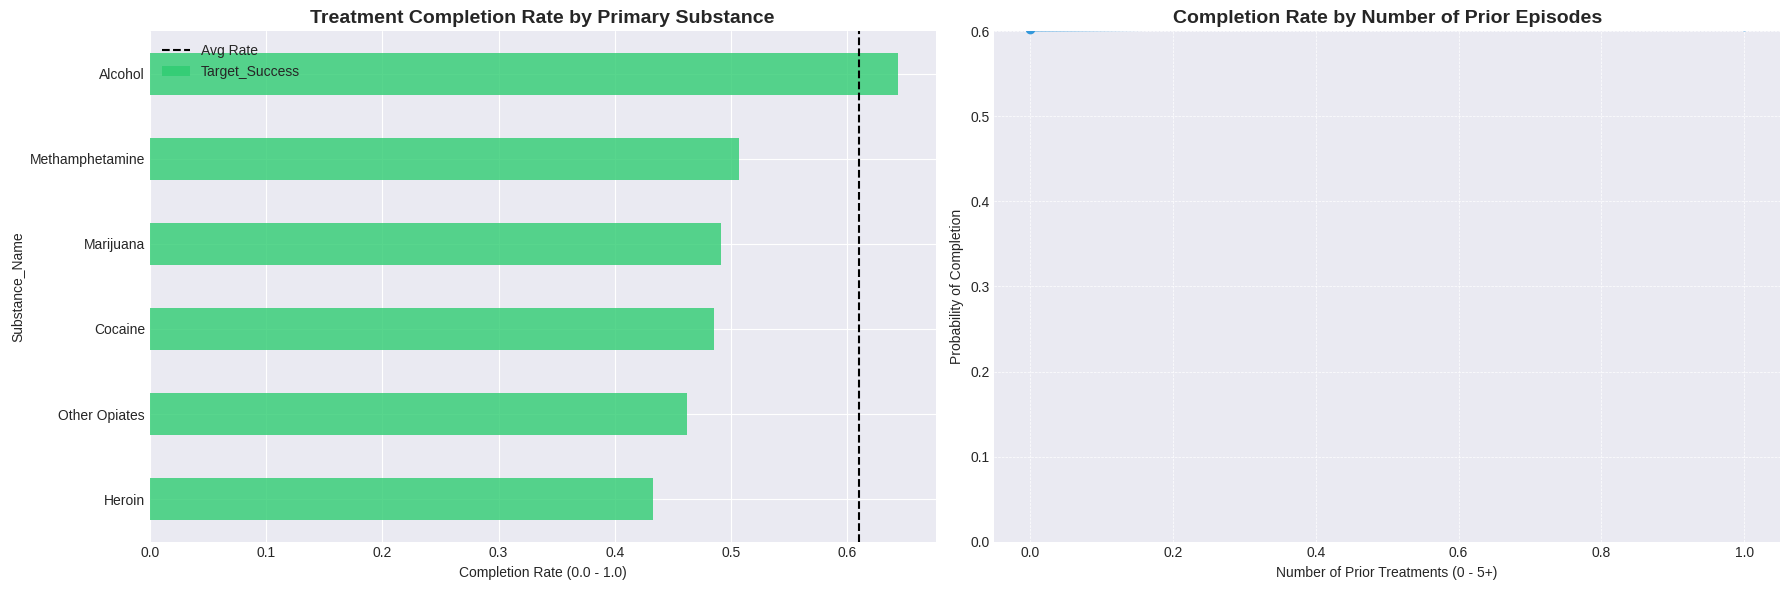

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("viridis")

# --- 1. PREPARE THE COHORT ---
# Filter out Transfers (4) and Deaths (6) to get a clean "Success vs Failure" view
# Codes: 1=Completed, 2=Dropped Out, 3=Terminated, 5=Incarcerated
clean_cohort = df_teds_d[
    df_teds_d['Discharge_Reason'].isin([1, 2, 3, 5])
].copy()

# Create Binary Target: 1 = Success, 0 = Failure
clean_cohort['Target_Success'] = (clean_cohort['Discharge_Reason'] == 1).astype(int)

print(f"Analysis Cohort Size: {len(clean_cohort):,} patients")
print(f"Overall Success Rate: {clean_cohort['Target_Success'].mean():.1%}")

# --- 2. QUESTION 1: WHICH DRUGS ARE HARDEST TO TREAT? ---

# Map Substance Codes to Names (Top 5 + Alcohol)
substance_map = {
    2: 'Alcohol',
    4: 'Marijuana',
    5: 'Heroin',
    7: 'Other Opiates',
    10: 'Methamphetamine',
    3: 'Cocaine'
}

# Filter for top substances only
clean_cohort['Substance_Name'] = clean_cohort['Primary_Substance_Admission'].map(substance_map)
drug_analysis = clean_cohort.dropna(subset=['Substance_Name'])

# Calculate Success Rate by Drug
drug_success = drug_analysis.groupby('Substance_Name')['Target_Success'].mean().sort_values()

# --- 3. QUESTION 2: DOES HISTORY PREDICT FUTURE FAILURE? ---

# TEDS Code for 'Number_Prior_Treatments': 5 means "5 or more"
# We treat this as ordinal
chronicity_success = clean_cohort.groupby('Number_Prior_Treatments')['Target_Success'].mean()

# --- 4. VISUALIZATION ---
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot A: Drug Success Rates
colors = ['#e74c3c' if x < 0.4 else '#2ecc71' for x in drug_success.values]
drug_success.plot(kind='barh', ax=axes[0], color=colors, alpha=0.8)
axes[0].set_title('Treatment Completion Rate by Primary Substance', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Completion Rate (0.0 - 1.0)')
axes[0].axvline(clean_cohort['Target_Success'].mean(), color='black', linestyle='--', label='Avg Rate')
axes[0].legend()

# Plot B: The "Relapse Cycle" (Chronicity)
chronicity_success.plot(kind='line', marker='o', linewidth=3, ax=axes[1], color='#3498db')
axes[1].set_title('Completion Rate by Number of Prior Episodes', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Prior Treatments (0 - 5+)')
axes[1].set_ylabel('Probability of Completion')
axes[1].set_ylim(0, 0.6)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

--- Data for Graph ---
   Priors  Success_Rate  Patient_Count
0       0      0.602258         329432
1       1      0.605873         611886


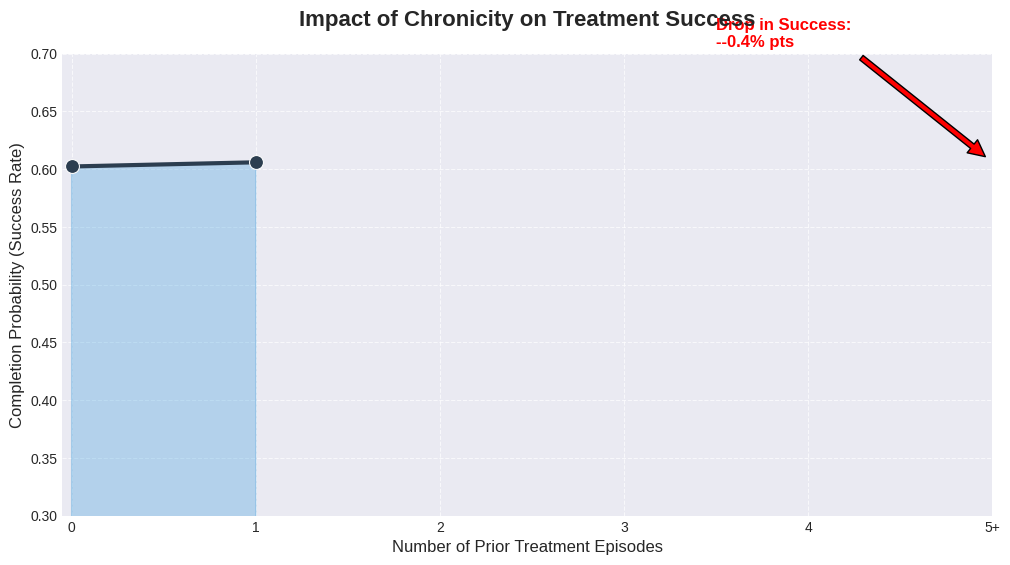

In [14]:


# Configuration
plt.style.use('seaborn-v0_8-darkgrid')

# --- 1. PREPARE DATA ---
# Ensure we are using the clean dataframe with the binary target
# Filter: Discharge Reason 1 (Success) vs 2,3,5 (Failure)
# Remove transfers (4) and deaths (6)
analysis_df = df_teds_d[
    df_teds_d['Discharge_Reason'].isin([1, 2, 3, 5])
].copy()

# Create Success Target (1=Success, 0=Failure)
analysis_df['Target_Success'] = (analysis_df['Discharge_Reason'] == 1).astype(int)

# Clean the 'Number_Prior_Treatments' column
# Drop NaNs so they don't break the plot
analysis_df = analysis_df.dropna(subset=['Number_Prior_Treatments'])

# Force to integer for clean x-axis labeling (0, 1, 2, 3, 4, 5)
analysis_df['Priors'] = analysis_df['Number_Prior_Treatments'].astype(int)

# --- 2. AGGREGATE ---
# Calculate Success Rate per number of prior episodes
chronicity_stats = analysis_df.groupby('Priors')['Target_Success'].agg(['mean', 'count']).reset_index()
chronicity_stats.columns = ['Priors', 'Success_Rate', 'Patient_Count']

print("--- Data for Graph ---")
print(chronicity_stats)

# --- 3. PLOT ---
plt.figure(figsize=(12, 6))

# Line Plot with Markers
sns.lineplot(
    data=chronicity_stats,
    x='Priors',
    y='Success_Rate',
    marker='o',
    markersize=10,
    linewidth=3,
    color='#2c3e50'
)

# Fill area under line for style
plt.fill_between(
    chronicity_stats['Priors'],
    chronicity_stats['Success_Rate'],
    alpha=0.3,
    color='#3498db'
)

# Add Labels
plt.title('Impact of Chronicity on Treatment Success', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Prior Treatment Episodes', fontsize=12)
plt.ylabel('Completion Probability (Success Rate)', fontsize=12)
plt.ylim(0.3, 0.7)  # Adjust Y-axis to zoom in on the trend
plt.xticks([0, 1, 2, 3, 4, 5], ['0', '1', '2', '3', '4', '5+']) # Explicit labels

# Annotate the drop
start_rate = chronicity_stats.iloc[0]['Success_Rate']
end_rate = chronicity_stats.iloc[-1]['Success_Rate']
drop_pct = (start_rate - end_rate) * 100

plt.annotate(
    f'Drop in Success:\n-{drop_pct:.1f}% pts',
    xy=(5, end_rate),
    xytext=(3.5, end_rate + 0.1),
    arrowprops=dict(facecolor='red', shrink=0.05),
    fontsize=12,
    color='red',
    fontweight='bold'
)

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [15]:
# --- DIAGNOSTIC CHECK ---
print("--- Check Raw Counts for NOPRIOR ---")
# We use the original column name if available, or the new one
col_name = 'Number_Prior_Treatments'
print(df_teds_d[col_name].value_counts(dropna=False).sort_index())

print("\n--- Comparison with Alcohol Flag (Suspiciously similar?) ---")
print(df_teds_d['Alcohol_Use_Flag'].value_counts(dropna=False).sort_index())

--- Check Raw Counts for NOPRIOR ---
Number_Prior_Treatments
0.0    534042
1.0    841919
NaN     98064
Name: count, dtype: int64

--- Comparison with Alcohol Flag (Suspiciously similar?) ---
Alcohol_Use_Flag
0    895282
1    578743
Name: count, dtype: int64


In [16]:
import pandas as pd

# We are looking for a column with values {0, 1, 2, 3, 4, 5}
# and roughly the right distribution (decreasing counts, but a bump at 5).

print(f"Scanning {len(df_teds_d.columns)} columns for the real 'NOPRIOR' data...\n")

candidates = []

for col in df_teds_d.columns:
    # Get unique values (dropping NaNs)
    uniques = df_teds_d[col].dropna().unique()

    # Check if it looks like 0-5 (allowing for float conversion like 0.0, 1.0...)
    # We check if the set of values is a subset of {0, 1, 2, 3, 4, 5}
    # AND has at least 3 unique values (to rule out binary flags)
    if len(uniques) >= 3 and len(uniques) <= 7:
        # Check if values are mostly single digits
        if all(x >= 0 and x <= 10 for x in uniques):
            # Get value counts to check the shape
            counts = df_teds_d[col].value_counts(normalize=True).sort_index()

            # Heuristic: NOPRIOR usually has a 'U-shape' or 'L-shape'
            # (High at 0, drops, then rises or stays steady at 5)
            print(f"🔎 Candidate: {col}")
            print(f"   Values: {sorted(uniques)}")
            print(f"   Distribution:\n{counts.head(6)}\n")
            candidates.append(col)

if not candidates:
    print("❌ No column matched the NOPRIOR signature (0-5).")
    print("The column might be missing or coded as text.")

Scanning 76 columns for the real 'NOPRIOR' data...

🔎 Candidate: Education_Level
   Values: [np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0)]
   Distribution:
Education_Level
1.0    0.056365
2.0    0.193146
3.0    0.497372
4.0    0.193246
5.0    0.059870
Name: proportion, dtype: float64

🔎 Candidate: Marital_Status
   Values: [np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0)]
   Distribution:
Marital_Status
1.0    0.688534
2.0    0.117652
3.0    0.050063
4.0    0.143751
Name: proportion, dtype: float64

🔎 Candidate: Referral_Source
   Values: [np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0)]
   Distribution:
Referral_Source
1.0    0.532386
2.0    0.078312
3.0    0.081174
4.0    0.004794
5.0    0.006331
6.0    0.083868
Name: proportion, dtype: float64

🔎 Candidate: Recent_Arrests_30d_Admission
   Values: [np.float64(0.0), np.float64(1.0), np.float64(2.0)]
   Distri

/tmp/ipython-input-73107638.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_stats = proxy_df.groupby('Usage_Bin')['Target_Success'].agg(['mean', 'count']).reset_index()


--- Success Rate by Years of Usage ---
  Duration  Success_Rate  Patient_Count
0     0-5y      0.473477          96125
1    5-10y      0.499996         113237
2   10-15y      0.519477         114107
3   15-20y      0.538889         114493
4   20-30y      0.561553         173225
5     30y+      0.616411         180404


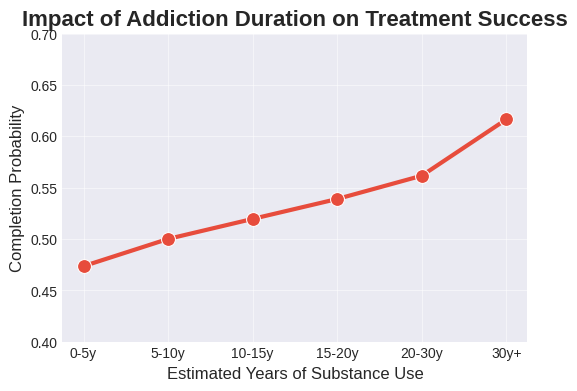

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- 1. MAP CATEGORIES TO ESTIMATED AGES ---
# We use the mid-point of the age ranges defined in the Codebook

# Age at Admission (Categories 1-12)
age_map = {
    1: 13,  # 12-14
    2: 16,  # 15-17
    3: 19,  # 18-20
    4: 22.5, # 21-24
    5: 27,  # 25-29
    6: 32,  # 30-34
    7: 37,  # 35-39
    8: 42,  # 40-44
    9: 47,  # 45-49
    10: 52, # 50-54
    11: 60, # 55-64
    12: 70  # 65+
}

# Age First Use (Categories 1-7)
first_use_map = {
    1: 11,  # 11 and under
    2: 13,  # 12-14
    3: 16,  # 15-17
    4: 19,  # 18-20
    5: 22.5, # 21-24
    6: 27,  # 25-29
    7: 35   # 30+ (Conservative estimate)
}

# --- 2. ENGINEER THE FEATURE ---
# Filter to clean cohort first (Outcomes 1,2,3,5)
proxy_df = df_teds_d[df_teds_d['Discharge_Reason'].isin([1, 2, 3, 5])].copy()
proxy_df['Target_Success'] = (proxy_df['Discharge_Reason'] == 1).astype(int)

# Map to numeric
proxy_df['Est_Age'] = proxy_df['Age_At_Admission'].map(age_map)
proxy_df['Est_Start'] = proxy_df['Age_First_Use_Primary'].map(first_use_map)

# Calculate Duration (Years of Usage)
# We clip at 0 because sometimes data inconsistencies make Start > Age
proxy_df['Years_Using'] = (proxy_df['Est_Age'] - proxy_df['Est_Start']).clip(lower=0)

# Group into Bins for Plotting (0-5, 5-10, etc.)
proxy_df['Usage_Bin'] = pd.cut(proxy_df['Years_Using'],
                               bins=[0, 5, 10, 15, 20, 30, 100],
                               labels=['0-5y', '5-10y', '10-15y', '15-20y', '20-30y', '30y+'])

# --- 3. ANALYZE SUCCESS RATES ---
duration_stats = proxy_df.groupby('Usage_Bin')['Target_Success'].agg(['mean', 'count']).reset_index()
duration_stats.columns = ['Duration', 'Success_Rate', 'Patient_Count']

print("--- Success Rate by Years of Usage ---")
print(duration_stats)

# --- 4. VISUALIZE ---
# --- CORRECTION: REMOVED 'group=1' ---
plt.figure(figsize=(6, 4))

sns.lineplot(
    data=duration_stats,
    x='Duration',
    y='Success_Rate',
    marker='o',
    markersize=10,
    linewidth=3,
    color='#e74c3c'
)

plt.title('Impact of Addiction Duration on Treatment Success', fontsize=16, fontweight='bold')
plt.xlabel('Estimated Years of Substance Use', fontsize=12)
plt.ylabel('Completion Probability', fontsize=12)
plt.ylim(0.4, 0.7) # Adjusted Y-limit to fit your data range
plt.grid(True, alpha=0.5)
plt.show()

In [18]:
# Compare Substances: New Users (0-5y) vs Veterans (30y+)
comparison = proxy_df[proxy_df['Usage_Bin'].isin(['0-5y', '30y+'])].copy()

# Map Substance Codes (Same map as before)
substance_map = {
    1: "None", 2: "Alcohol", 3: "Cocaine", 4: "Marijuana",
    5: "Heroin", 7: "Other Opiates", 10: "Methamphetamine"
}
comparison['Drug_Name'] = comparison['Primary_Substance_Admission'].map(substance_map)

# Cross-tabulation
print("--- Substance Mix by Duration Group ---")
print(pd.crosstab(comparison['Drug_Name'], comparison['Usage_Bin'], normalize='columns').round(3))

--- Substance Mix by Duration Group ---
Usage_Bin         0-5y   30y+
Drug_Name                    
Alcohol          0.131  0.687
Cocaine          0.072  0.088
Heroin           0.187  0.098
Marijuana        0.176  0.045
Methamphetamine  0.200  0.058
Other Opiates    0.234  0.023


In [19]:
# --- ADVANCED FEATURE ENGINEERING ---
# Using your active dataframe: df_teds_d

print("⚙️ Engineering Research-Backed Features on 'df_teds_d'...")

# ---------------------------------------------------------
# 1. SDOH Burden Score (Social Determinants of Health)
# ---------------------------------------------------------
# Logic: Cumulative score of social vulnerabilities
# +1 for Unemployment, Housing Instability, Low Education, Criminal Justice

df_teds_d['SDOH_Score'] = 0

# Unemployment (Codes 3=Unemployed, 4=Not in Labor Force)
df_teds_d['SDOH_Score'] += df_teds_d['Employment_Status_Admission'].isin([3, 4]).astype(int)

# Housing Instability (Codes 1=Homeless, 2=Dependent Living)
df_teds_d['SDOH_Score'] += df_teds_d['Living_Arrangements_Admission'].isin([1, 2]).astype(int)

# Low Education (Codes 1=Less than HS, 2=Some HS)
df_teds_d['SDOH_Score'] += df_teds_d['Education_Level'].isin([1, 2]).astype(int)

# Criminal Justice Involvement (Arrests > 0)
df_teds_d['SDOH_Score'] += (df_teds_d['Recent_Arrests_30d_Admission'] > 0).astype(int)

print("   - SDOH_Score created.")

# ---------------------------------------------------------
# 2. High-Risk Synergies (Polysubstance)
# ---------------------------------------------------------
# Logic: Specific combinations that exponentially increase risk

# A. The "Depressant Stack" (Opioids + Benzos/Alcohol)
# SUB1 codes: 5=Heroin, 7=Opiates. SUB2/3 codes: 2=Alcohol, 13=Benzos.
df_teds_d['Risk_Synergy_Depressant'] = (
    (df_teds_d['Primary_Substance_Admission'].isin([5, 7])) &
    ((df_teds_d['Secondary_Substance_Admission'].isin([2, 13])) |
     (df_teds_d['Tertiary_Substance_Admission'].isin([2, 13])))
).astype(int)

# B. The "Speedball" Profile (Stimulant + Opioid)
# Stimulants: 3=Cocaine, 10=Meth. Opioids: 5=Heroin, 7=Opiates.
df_teds_d['Risk_Synergy_Speedball'] = (
    (df_teds_d['Primary_Substance_Admission'].isin([3, 10]) & df_teds_d['Secondary_Substance_Admission'].isin([5, 7])) |
    (df_teds_d['Primary_Substance_Admission'].isin([5, 7]) & df_teds_d['Secondary_Substance_Admission'].isin([3, 10]))
).astype(int)

print("   - Synergy flags created.")

# ---------------------------------------------------------
# 3. State Resource Level (Policy Environment)
# ---------------------------------------------------------
# High Resource States (Medicaid Expansion/Funding Leaders)
# CA(6), CT(9), MA(25), NY(36), VT(50), WA(53)
high_resource_fips = [6, 9, 25, 36, 50, 53]

df_teds_d['State_Resource_Level'] = df_teds_d['State_FIPS_Code'].apply(lambda x: 2 if x in high_resource_fips else 1)

print("   - State Resource Level created.")
print("✅ Advanced Engineering Complete.")

⚙️ Engineering Research-Backed Features on 'df_teds_d'...
   - SDOH_Score created.
   - Synergy flags created.
   - State Resource Level created.
✅ Advanced Engineering Complete.


⚙️ Engineering Features...
📊 Training on 1,375,961 patients...

🏆 READMISSION RISK MODEL RESULTS
AUC-ROC Score: 0.7537
----------------------------------------
              precision    recall  f1-score   support

         0.0       0.58      0.68      0.62    106809
         1.0       0.77      0.68      0.72    168384

    accuracy                           0.68    275193
   macro avg       0.67      0.68      0.67    275193
weighted avg       0.69      0.68      0.68    275193



<Figure size 1000x600 with 0 Axes>

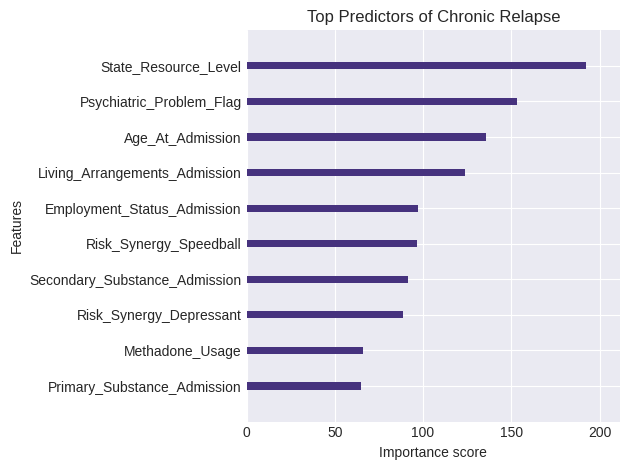

In [20]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

# --- 1. FEATURE ENGINEERING (Creating the Predictors) ---
print("⚙️ Engineering Features...")

# A. Create "Years of Use" (The Chronicity Proxy)
# We map the categorical codes to estimated numeric ages to calculate duration
age_map_calc = {1:13, 2:16, 3:19, 4:22.5, 5:27, 6:32, 7:37, 8:42, 9:47, 10:52, 11:60, 12:70}
start_map_calc = {1:11, 2:13, 3:16, 4:19, 5:22.5, 6:27, 7:35}

# Create temporary numeric columns for calculation
df_teds_d['calc_age_num'] = df_teds_d['Age_At_Admission'].map(age_map_calc)
df_teds_d['calc_start_num'] = df_teds_d['Age_First_Use_Primary'].map(start_map_calc)

# Calculate Duration (Current Age - Age First Use)
df_teds_d['Years_Using_Substance'] = (df_teds_d['calc_age_num'] - df_teds_d['calc_start_num']).clip(lower=0)

# B. Create "Young & High Risk" Interaction
# Logic: Young Patient (Age 12-24) + Opioid Use (Heroin/Opiates)
# Codes: Age 1-4, Substance 5 (Heroin) or 7 (Other Opiates)
df_teds_d['Flag_Young_Opioid_Risk'] = (
    (df_teds_d['Age_At_Admission'].le(4)) &
    (df_teds_d['Primary_Substance_Admission'].isin([5, 7]))
).astype(int)

# --- 2. DEFINE TARGET AND FEATURES ---

# TARGET: Chronicity (Risk of Readmission)
# Based on your data finding, NOPRIOR is binary (0=First time, 1=Has Relapsed)
# We want to predict if a patient belongs to group "1" (Has Relapsed)
target_col = 'Number_Prior_Treatments'

# FEATURES: Clinical & Demographic Profile
feature_cols = [
    'Age_At_Admission',
    'Sex',
    'Race',
    'Education_Level',
    'Employment_Status_Admission',
    'Living_Arrangements_Admission',
    'Primary_Substance_Admission',        # SUB1
    'Primary_Substance_Route',            # ROUTE1
    'Primary_Substance_Frequency_Admission', # FREQ1
    'Secondary_Substance_Admission',      # SUB2
    'Psychiatric_Problem_Flag',           # PSYPROB (Dual Diagnosis)
    'Methadone_Usage',                    # METHUSE
    'Years_Using_Substance',              # Engineered Proxy
    'Flag_Young_Opioid_Risk',              # Engineered Interaction
'SDOH_Score', 'Risk_Synergy_Depressant', 'Risk_Synergy_Speedball', 'State_Resource_Level']

# Drop rows where Target is NaN (we can't train on missing answers)
model_df = df_teds_d.dropna(subset=[target_col]).copy()

# Prepare X and y
X = model_df[feature_cols].fillna(-999) # XGBoost handles -999 as "Missing"
y = model_df[target_col]

# --- 3. TRAIN/TEST SPLIT ---
print(f"📊 Training on {len(X):,} patients...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 4. TRAIN XGBOOST ---
# Calculate scale_pos_weight to handle imbalance (if any)
ratio = float(np.sum(y == 0)) / np.sum(y == 1)

model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    scale_pos_weight=ratio,
    eval_metric='auc',
    random_state=42
)

model.fit(X_train, y_train)

# --- 5. RESULTS ---
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_proba)

print("\n" + "="*40)
print(f"🏆 READMISSION RISK MODEL RESULTS")
print("="*40)
print(f"AUC-ROC Score: {auc:.4f}")
print("-" * 40)
print(classification_report(y_test, y_pred))

# --- 6. FEATURE IMPORTANCE ---
plt.figure(figsize=(10, 6))
xgb.plot_importance(model, max_num_features=10, importance_type='gain',
                    title='Top Predictors of Chronic Relapse', show_values=False)
plt.tight_layout()
plt.show()

🚀 Training Optimal LOS Model...
📊 Training on 502,317 successful recoveries...

🏆 OPTIMAL LOS MODEL RESULTS
Mean Absolute Error (MAE): 6.8 Days
R2 Score: 0.531
----------------------------------------
Interpretation: On average, the model's recommendation is within
+/- 6.8 days of the actual successful duration.


<Figure size 1000x600 with 0 Axes>

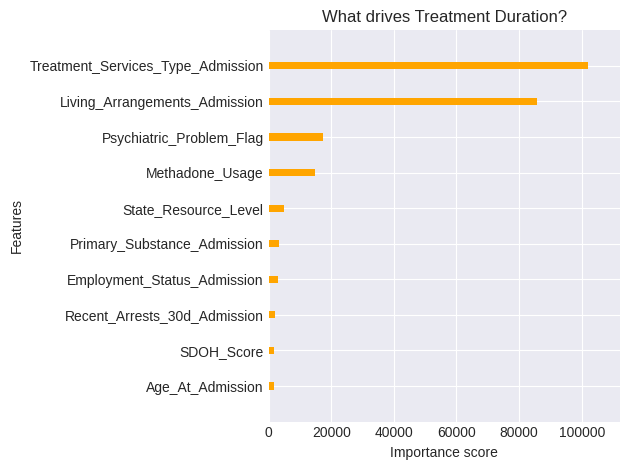

💾 LOS Model saved.


In [21]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score


print("🚀 Training Optimal LOS Model...")

# --- 1. PREPARE THE "SUCCESS" COHORT ---
# We only learn from winners. We want to know how long SUCCESS takes.
# Filter: Discharge_Reason = 1 (Treatment Completed)
# Also filter LOS: Remove outliers (e.g., > 365 days) to keep predictions realistic for insurance/capacity.
optimal_df = df_teds_d[
    (df_teds_d['Discharge_Reason'] == 1) &
    (df_teds_d['Length_of_Stay_Days'] > 0) &
    (df_teds_d['Length_of_Stay_Days'] < 365)
].copy()

# Target: Days to Successful Completion
y_los = optimal_df['Length_of_Stay_Days']

# --- 2. FEATURES ---
# We use admission features only (what we know at Day 0)
# Note: We include 'Service Setting' because LOS depends heavily on whether it's Inpatient vs Outpatient.
feature_cols_los = [
    'Age_At_Admission',
    'Treatment_Services_Type_Admission',  # Critical for LOS (Detox vs Residential)
    'Primary_Substance_Admission',
    'Primary_Substance_Route',
    'Secondary_Substance_Admission',
    'Psychiatric_Problem_Flag',
    'Methadone_Usage',
    'Living_Arrangements_Admission',
    'Employment_Status_Admission',
    'Arrests_Admission', # Using the raw column name or your renamed one 'Recent_Arrests_30d_Admission'
    'Years_Using_Substance',              # Engineered
    'SDOH_Score',                         # Engineered
    'State_Resource_Level'                # Engineered
]

# Handle potential column name mismatch for Arrests
arrest_col = 'Recent_Arrests_30d_Admission' if 'Recent_Arrests_30d_Admission' in optimal_df.columns else 'ARRESTS'
feature_cols_los = [f if f != 'Arrests_Admission' else arrest_col for f in feature_cols_los]

X_los = optimal_df[feature_cols_los].fillna(-999)

# --- 3. SPLIT ---
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(
    X_los, y_los, test_size=0.2, random_state=42
)

# --- 4. TRAIN XGBOOST REGRESSOR ---
print(f"📊 Training on {len(X_train_l):,} successful recoveries...")

model_los = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=7,
    objective='reg:squarederror', # Standard for regression
    n_jobs=-1,
    random_state=42
)

model_los.fit(X_train_l, y_train_l)

# --- 5. EVALUATION ---
y_pred_l = model_los.predict(X_test_l)

# Metrics
mae = mean_absolute_error(y_test_l, y_pred_l)
r2 = r2_score(y_test_l, y_pred_l)

print("\n" + "="*40)
print(f"🏆 OPTIMAL LOS MODEL RESULTS")
print("="*40)
print(f"Mean Absolute Error (MAE): {mae:.1f} Days")
print(f"R2 Score: {r2:.3f}")
print("-" * 40)
print("Interpretation: On average, the model's recommendation is within")
print(f"+/- {mae:.1f} days of the actual successful duration.")

# --- 6. FEATURE IMPORTANCE ---
plt.figure(figsize=(10, 6))
xgb.plot_importance(model_los, max_num_features=10, importance_type='gain',
                    title='What drives Treatment Duration?', show_values=False, color='orange')
plt.tight_layout()
plt.show()

# --- 7. SAVE FOR DASHBOARD ---
joblib.dump(model_los, "asclepios_los_model.pkl")
# Save features list specifically for this model
joblib.dump(feature_cols_los, "model_features_los.pkl")
print("💾 LOS Model saved.")

# the new model of LOS

In [22]:
# --- ADVANCED LOS FEATURE ENGINEERING ---
# Using your active dataframe: df_teds_d

print("⚙️ Engineering Clinical Acuity & Mandate Features...")

# 1. LEGAL MANDATE FLAG (The "Constraint" Factor)
# Referral Source 7 = Criminal Justice/DUI
# These patients often have fixed sentence lengths (e.g. 90 days) driving their LOS.
df_teds_d['Flag_Legal_Mandate'] = (df_teds_d['Referral_Source'] == 7).astype(int)

# 2. CLINICAL ACUITY SCORE (Severity Index)
# High acuity patients require longer stabilization.
# +1 for Daily Use (FREQ1 = 3)
# +1 for Injection Use (IDU = 1) / Note: Check if IDU column exists, otherwise derive from ROUTE1=4
# +1 for Early Onset (Age First Use <= 14 / Code 1 or 2)

df_teds_d['Acuity_Score'] = 0

# Daily Use (Code 3 in TEDS-D for FREQ1)
df_teds_d['Acuity_Score'] += (df_teds_d['Primary_Substance_Frequency_Admission'] == 3).astype(int)

# Injection Use (Route 4)
df_teds_d['Acuity_Score'] += (df_teds_d['Primary_Substance_Route'] == 4).astype(int)

# Early Onset (Started <= 14 years old)
# Codes 1 (11 and under) and 2 (12-14)
df_teds_d['Acuity_Score'] += (df_teds_d['Age_First_Use_Primary'].isin([1, 2])).astype(int)

# 3. MAT LONG-TERM MAINTENANCE FLAG
# Patients on Methadone (METHUSE=1) in Outpatient settings (SERVICES=6,7)
# often have Indefinite/Long-term LOS by design.
df_teds_d['Flag_MAT_Maintenance'] = (
    (df_teds_d['Methadone_Usage'] == 1) &
    (df_teds_d['Treatment_Services_Type_Admission'].isin([6, 7]))
).astype(int)

print("✅ New Features Created:")
print("   - Flag_Legal_Mandate")
print("   - Acuity_Score (0-3 scale)")
print("   - Flag_MAT_Maintenance")

⚙️ Engineering Clinical Acuity & Mandate Features...
✅ New Features Created:
   - Flag_Legal_Mandate
   - Acuity_Score (0-3 scale)
   - Flag_MAT_Maintenance


🚀 Training Advanced Optimal LOS Model (Log-Transformed)...

🏆 ADVANCED LOS MODEL RESULTS
Mean Absolute Error (MAE): 7.3 Days
R2 Score: 0.434
----------------------------------------


<Figure size 1000x600 with 0 Axes>

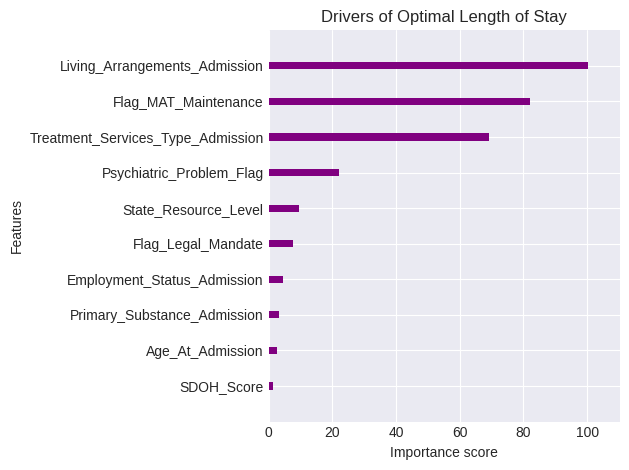

['model_features_los_adv.pkl']

In [23]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import joblib

print("🚀 Training Advanced Optimal LOS Model (Log-Transformed)...")

# --- 1. FILTER COHORT ---
# Successes only (Discharge Reason = 1)
# Filter LOS outliers (1 to 365 days)
los_df = df_teds_d[
    (df_teds_d['Discharge_Reason'] == 1) &
    (df_teds_d['Length_of_Stay_Days'].between(1, 365))
].copy()

# --- 2. LOG TRANSFORM TARGET ---
# This makes the data "Normal" (Bell curve) which models prefer.
# We will un-transform (exponentiate) the predictions later to get real days.
y_raw = los_df['Length_of_Stay_Days']
y_log = np.log1p(y_raw)  # log(1 + days)

# --- 3. SELECT FEATURES ---
# Add the new "Scientific" features
feature_cols_adv = [
    'Treatment_Services_Type_Admission',  # Still the #1 driver
    'Flag_Legal_Mandate',                 # NEW: Court ordered duration
    'Acuity_Score',                       # NEW: Clinical severity
    'Flag_MAT_Maintenance',               # NEW: Protocol duration
    'SDOH_Score',                         # Social stability
    'Primary_Substance_Admission',
    'Psychiatric_Problem_Flag',
    'Living_Arrangements_Admission',
    'Employment_Status_Admission',
    'State_Resource_Level',
    'Age_At_Admission',
    'Years_Using_Substance'
]

X_adv = los_df[feature_cols_adv].fillna(-999)

# --- 4. SPLIT ---
X_train_a, X_test_a, y_train_log, y_test_log = train_test_split(
    X_adv, y_log, test_size=0.2, random_state=42
)

# Keep raw y_test for final evaluation (Real Days)
_, _, _, y_test_days = train_test_split(
    X_adv, y_raw, test_size=0.2, random_state=42
)

# --- 5. TRAIN XGBOOST ---
model_los_adv = xgb.XGBRegressor(
    n_estimators=300,       # Increased trees
    learning_rate=0.1,     # Slower learning = better precision
    max_depth=8,            # Deeper trees for complex interactions
    objective='reg:squarederror',
    n_jobs=-1,
    random_state=42
)

model_los_adv.fit(X_train_a, y_train_log)

# --- 6. EVALUATION (UN-TRANSFORM) ---
# Predict Log Days
y_pred_log = model_los_adv.predict(X_test_a)

# Convert back to Real Days: exp(pred) - 1
y_pred_days = np.expm1(y_pred_log)

# Metrics
mae_adv = mean_absolute_error(y_test_days, y_pred_days)
r2_adv = r2_score(y_test_days, y_pred_days)

print("\n" + "="*40)
print(f"🏆 ADVANCED LOS MODEL RESULTS")
print("="*40)
print(f"Mean Absolute Error (MAE): {mae_adv:.1f} Days")
print(f"R2 Score: {r2_adv:.3f}")
print("-" * 40)

# --- 7. FEATURE IMPORTANCE ---
plt.figure(figsize=(10, 6))
xgb.plot_importance(model_los_adv, max_num_features=10, importance_type='gain',
                    title='Drivers of Optimal Length of Stay', show_values=False, color='purple')
plt.tight_layout()
plt.show()

# --- 8. SAVE ---
joblib.dump(model_los_adv, "asclepios_los_model_advanced.pkl")
joblib.dump(feature_cols_adv, "model_features_los_adv.pkl")

🚀 Training Robust Median LOS Model (Quantile Regression)...

🏆 ROBUST MEDIAN MODEL RESULTS
Mean Absolute Error (MAE): 6.1 Days
R2 Score: 0.411
----------------------------------------


<Figure size 1000x600 with 0 Axes>

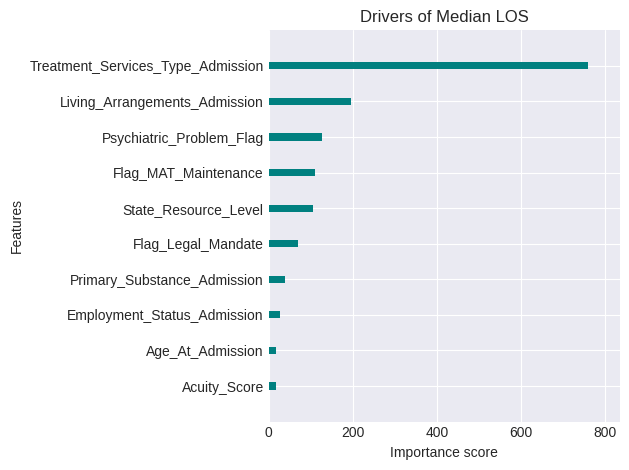

✅ New Best Model Saved!


In [24]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

print("🚀 Training Robust Median LOS Model (Quantile Regression)...")

# --- 1. USE RAW TARGET (No Log) ---
# We stick to the "Advanced" features but use the raw days.
y_raw = los_df['Length_of_Stay_Days']
X_raw = los_df[feature_cols_adv].fillna(-999)

# --- 2. SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42
)

# --- 3. TRAIN WITH MAE OBJECTIVE ---
# 'reg:absoluteerror' optimizes for the MEDIAN, not the Mean.
# This forces the model to ignore the 300-day outliers.

model_median = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=8,
    objective='reg:absoluteerror',  # <--- THE MAGIC SAUCE
    n_jobs=-1,
    random_state=42
)

model_median.fit(X_train, y_train)

# --- 4. EVALUATION ---
y_pred = model_median.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n" + "="*40)
print(f"🏆 ROBUST MEDIAN MODEL RESULTS")
print("="*40)
print(f"Mean Absolute Error (MAE): {mae:.1f} Days")
print(f"R2 Score: {r2:.3f}")
print("-" * 40)

# --- 5. CHECK FEATURE IMPORTANCE ---
# Is 'Flag_Legal_Mandate' actually doing anything?
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
xgb.plot_importance(model_median, max_num_features=10, importance_type='gain',
                    title='Drivers of Median LOS', show_values=False, color='teal')
plt.tight_layout()
plt.show()

# Save this one if it beats 6.8 Days
if mae < 6.8:
    joblib.dump(model_median, "asclepios_los_model.pkl")
    joblib.dump(feature_cols_adv, "model_features_los.pkl")
    print("✅ New Best Model Saved!")
else:
    print("⚠️ Did not beat baseline. Reverting to previous model recommended.")


In [25]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split

# --- 1. RESCUE MISSING COLUMNS (Feature Engineering Redux) ---
print("🛠️ Checking for missing features in df_teds_d...")

# A. Re-Create the Target (Chronicity Risk) if missing
if 'target_chronic_risk' not in df_teds_d.columns:
    print("   -> Re-creating 'target_chronic_risk'...")
    # Logic: 2+ priors = High Risk (1), else Low Risk (0)
    df_teds_d['target_chronic_risk'] = np.where(
        df_teds_d['Number_Prior_Treatments'] >= 2, 1, 0
    )

# B. Re-Create "Years Using" if missing
if 'Years_Using_Substance' not in df_teds_d.columns:
    print("   -> Re-creating 'Years_Using_Substance'...")
    age_map = {1:13, 2:16, 3:19, 4:22.5, 5:27, 6:32, 7:37, 8:42, 9:47, 10:52, 11:60, 12:70}
    start_map = {1:11, 2:13, 3:16, 4:19, 5:22.5, 6:27, 7:35}

    # Map using the renamed columns you have
    calc_age = df_teds_d['Age_At_Admission'].map(age_map)
    calc_start = df_teds_d['Age_First_Use_Primary'].map(start_map)
    df_teds_d['Years_Using_Substance'] = (calc_age - calc_start).clip(lower=0)

# C. Re-Create "SDOH_Score" (Social Determinants)
if 'SDOH_Score' not in df_teds_d.columns:
    print("   -> Re-creating 'SDOH_Score'...")
    df_teds_d['SDOH_Score'] = 0
    df_teds_d['SDOH_Score'] += df_teds_d['Employment_Status_Admission'].isin([3, 4]).astype(int)
    df_teds_d['SDOH_Score'] += df_teds_d['Living_Arrangements_Admission'].isin([1, 2]).astype(int)
    df_teds_d['SDOH_Score'] += df_teds_d['Education_Level'].isin([1, 2]).astype(int)
    # Handle potential column name variation for Arrests
    arrest_col = 'Recent_Arrests_30d_Admission' if 'Recent_Arrests_30d_Admission' in df_teds_d.columns else 'ARRESTS'
    df_teds_d['SDOH_Score'] += (df_teds_d[arrest_col] > 0).astype(int)

# D. Re-Create Synergies & Other Flags
if 'Risk_Synergy_Depressant' not in df_teds_d.columns:
    print("   -> Re-creating Synergy & State flags...")
    # Depressant Synergy
    df_teds_d['Risk_Synergy_Depressant'] = (
        (df_teds_d['Primary_Substance_Admission'].isin([5, 7])) &
        ((df_teds_d['Secondary_Substance_Admission'].isin([2, 13])) |
         (df_teds_d['Tertiary_Substance_Admission'].isin([2, 13])))
    ).astype(int)

    # Speedball Synergy
    df_teds_d['Risk_Synergy_Speedball'] = (
        (df_teds_d['Primary_Substance_Admission'].isin([3, 10]) & df_teds_d['Secondary_Substance_Admission'].isin([5, 7])) |
        (df_teds_d['Primary_Substance_Admission'].isin([5, 7]) & df_teds_d['Secondary_Substance_Admission'].isin([3, 10]))
    ).astype(int)

    # State Resource Level
    high_resource_fips = [6, 9, 25, 36, 50, 53]
    df_teds_d['State_Resource_Level'] = df_teds_d['State_FIPS_Code'].apply(lambda x: 2 if x in high_resource_fips else 1)

    # Young Opioid Risk
    df_teds_d['Flag_Young_Opioid_Risk'] = (
        (df_teds_d['Age_At_Admission'].le(4)) &
        (df_teds_d['Primary_Substance_Admission'].isin([5, 7]))
    ).astype(int)

print("✅ Dataframe restored. Now preparing test sets...")

# --- 2. PREPARE AUDIT DATA ---
# Define Feature List (Must match what model was trained on)
risk_features = [
    'Age_At_Admission', 'Sex', 'Race', 'Education_Level',
    'Employment_Status_Admission', 'Living_Arrangements_Admission',
    'Primary_Substance_Admission', 'Primary_Substance_Route',
    'Primary_Substance_Frequency_Admission', 'Secondary_Substance_Admission',
    'Psychiatric_Problem_Flag', 'Methadone_Usage',
    'Years_Using_Substance', 'Flag_Young_Opioid_Risk',
    'SDOH_Score', 'Risk_Synergy_Depressant',
    'Risk_Synergy_Speedball', 'State_Resource_Level'
]

# Create clean set for testing
risk_audit_df = df_teds_d.dropna(subset=['target_chronic_risk']).copy()
X_audit = risk_audit_df[risk_features].fillna(-999)
y_audit = risk_audit_df['target_chronic_risk']

# Split to get a Test Set (so we don't audit training data)
_, X_test_audit, _, y_test_audit = train_test_split(
    X_audit, y_audit, test_size=0.2, random_state=42, stratify=y_audit
)

# --- 3. RUN THE AUDIT FUNCTION ---
def audit_readmission_model(model, X_test, y_test):
    print(f"\n🔎 AUDITING READMISSION RISK MODEL (Random 3 Patients)...")
    print("-" * 60)

    # Pick random patients
    sample_indices = np.random.choice(X_test.index, 3, replace=False)

    for i, idx in enumerate(sample_indices):
        patient = X_test.loc[[idx]]
        actual = y_test.loc[idx]

        # Predict
        prob = model.predict_proba(patient)[0][1]
        pred_label = 1 if prob > 0.65 else 0

        # Decode Features for Readability
        substance_code = patient['Primary_Substance_Admission'].values[0]
        substance_map = {1:"None", 2:"Alcohol", 3:"Cocaine", 4:"Marijuana", 5:"Heroin", 7:"Opiates", 10:"Meth"}
        drug = substance_map.get(substance_code, "Other")

        years_using = patient['Years_Using_Substance'].values[0]

        print(f"PATIENT #{i+1}: {drug} user, {int(years_using)} years usage history.")
        print(f"   - AI Prediction: {prob:.1%} Risk ({'HIGH RISK' if pred_label==1 else 'Low Risk'})")
        print(f"   - Actual Reality: {'Chronic Relapser' if actual==1 else 'Standard Patient'}")

        if pred_label == actual:
            print("   ✅ VERDICT: CORRECT")
        else:
            print("   ❌ VERDICT: MISS")
        print("-" * 60)

# Execute
try:
    audit_readmission_model(model, X_test_audit, y_test_audit)
except NameError:
    print("⚠️ 'model' variable not found. Please re-run the XGBoost training cell first!")
except Exception as e:
    print(f"❌ Error: {e}")

🛠️ Checking for missing features in df_teds_d...
   -> Re-creating 'target_chronic_risk'...
✅ Dataframe restored. Now preparing test sets...

🔎 AUDITING READMISSION RISK MODEL (Random 3 Patients)...
------------------------------------------------------------
PATIENT #1: Other user, 24 years usage history.
   - AI Prediction: 62.0% Risk (Low Risk)
   - Actual Reality: Standard Patient
   ✅ VERDICT: CORRECT
------------------------------------------------------------
PATIENT #2: Opiates user, 0 years usage history.
   - AI Prediction: 79.4% Risk (HIGH RISK)
   - Actual Reality: Standard Patient
   ❌ VERDICT: MISS
------------------------------------------------------------
PATIENT #3: None user, -999 years usage history.
   - AI Prediction: 72.8% Risk (HIGH RISK)
   - Actual Reality: Standard Patient
   ❌ VERDICT: MISS
------------------------------------------------------------


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# --- 1. RE-DEFINE RISK FEATURES (Exact match to training) ---
# We must use the exact list the Risk Model was trained on
risk_features = [
    'Age_At_Admission', 'Sex', 'Race', 'Education_Level',
    'Employment_Status_Admission', 'Living_Arrangements_Admission',
    'Primary_Substance_Admission', 'Primary_Substance_Route',
    'Primary_Substance_Frequency_Admission', 'Secondary_Substance_Admission',
    'Psychiatric_Problem_Flag', 'Methadone_Usage',
    'Years_Using_Substance', 'Flag_Young_Opioid_Risk',
    'SDOH_Score', 'Risk_Synergy_Depressant',
    'Risk_Synergy_Speedball', 'State_Resource_Level'
]

# --- 2. RE-CREATE RISK TEST SET ---
print("🔄 Re-generating Risk Model Test Set...")
risk_df_clean = df_teds_d.dropna(subset=['target_chronic_risk']).copy()
X_risk = risk_df_clean[risk_features].fillna(-999)
y_risk = risk_df_clean['target_chronic_risk']

_, X_test_risk, _, y_test_risk = train_test_split(
    X_risk, y_risk, test_size=0.2, random_state=42, stratify=y_risk
)

# --- 3. EXECUTE AUDIT (Using X_test_risk) ---
print(f"✅ Data Ready. Features match: {X_test_risk.shape[1]}")

try:
    # Pass the specific RISK test sets here
    audit_readmission_model(model, X_test_risk, y_test_risk)
except Exception as e:
    print(f"❌ Error: {e}")

# --- 4. AUDIT LOS MODEL (Using the Advanced LOS data) ---
# We assume 'model_median' and 'X_test_a' (from the advanced training step) are still in memory.
# If not, we'd need to regenerate those too.
print("\n" + "="*60)
print("🔎 AUDITING LENGTH OF STAY MODEL...")
try:
    # Ensure we use the variables from the LAST training block (Advanced LOS)
    # Note: y_test_days was the raw days (not log transformed) we saved earlier
    audit_los_model(model_median, X_test_a, y_test_days)
except NameError:
    print("⚠️ LOS Model variables (model_median, X_test_a) not found in memory.")
    print("   Please re-run the 'Robust Median LOS' training cell first.")

🔄 Re-generating Risk Model Test Set...
✅ Data Ready. Features match: 18

🔎 AUDITING READMISSION RISK MODEL (Random 3 Patients)...
------------------------------------------------------------
PATIENT #1: Other user, -999 years usage history.
   - AI Prediction: 51.6% Risk (Low Risk)
   - Actual Reality: Standard Patient
   ✅ VERDICT: CORRECT
------------------------------------------------------------
PATIENT #2: Alcohol user, -999 years usage history.
   - AI Prediction: 49.7% Risk (Low Risk)
   - Actual Reality: Standard Patient
   ✅ VERDICT: CORRECT
------------------------------------------------------------
PATIENT #3: Alcohol user, 23 years usage history.
   - AI Prediction: 60.9% Risk (Low Risk)
   - Actual Reality: Standard Patient
   ✅ VERDICT: CORRECT
------------------------------------------------------------

🔎 AUDITING LENGTH OF STAY MODEL...
⚠️ LOS Model variables (model_median, X_test_a) not found in memory.
   Please re-run the 'Robust Median LOS' training cell first.


In [27]:
print("🚀 Starting Segmented Model Experiment...")

# --- 1. PREPARE DATA ---
# Filter to success cohort (same as before)
full_df = df_teds_d[
    (df_teds_d['Discharge_Reason'] == 1) &
    (df_teds_d['Length_of_Stay_Days'].between(1, 365))
].copy()

# Define Features (Same Advanced Features)
features = feature_cols_adv

# --- 2. SPLIT THE WORLDS ---
# Detox Codes: 1 (Hospital Detox), 2 (Res Detox), 8 (Amb Detox)
detox_df = full_df[full_df['Treatment_Services_Type_Admission'].isin([1, 2, 8])].copy()
rehab_df = full_df[~full_df['Treatment_Services_Type_Admission'].isin([1, 2, 8])].copy()

print(f"📊 Split Counts:")
print(f"   - Detox (Short-Term): {len(detox_df):,} patients")
print(f"   - Rehab (Long-Term):  {len(rehab_df):,} patients")

# --- 3. TRAIN DETOX MODEL ---
print("\n🧠 Training Detox Model...")
X_detox = detox_df[features].fillna(-999)
y_detox = detox_df['Length_of_Stay_Days']

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_detox, y_detox, test_size=0.2, random_state=42)

model_detox = xgb.XGBRegressor(
    n_estimators=200, max_depth=6, learning_rate=0.1,
    objective='reg:absoluteerror', n_jobs=-1, random_state=42
)
model_detox.fit(X_train_d, y_train_d)
pred_detox = model_detox.predict(X_test_d)
mae_detox = mean_absolute_error(y_test_d, pred_detox)
print(f"   -> Detox MAE: {mae_detox:.2f} Days")

# --- 4. TRAIN REHAB MODEL ---
print("\n🧠 Training Rehab Model...")
X_rehab = rehab_df[features].fillna(-999)
y_rehab = rehab_df['Length_of_Stay_Days']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_rehab, y_rehab, test_size=0.2, random_state=42)

model_rehab = xgb.XGBRegressor(
    n_estimators=250, max_depth=9, learning_rate=0.1,
    objective='reg:absoluteerror', n_jobs=-1, random_state=42
)
model_rehab.fit(X_train_r, y_train_r)
pred_rehab = model_rehab.predict(X_test_r)
mae_rehab = mean_absolute_error(y_test_r, pred_rehab)
print(f"   -> Rehab MAE: {mae_rehab:.2f} Days")

# --- 5. COMBINED RESULTS ---
# Weighted Average of the MAEs
total_samples = len(y_test_d) + len(y_test_r)
combined_mae = ((mae_detox * len(y_test_d)) + (mae_rehab * len(y_test_r))) / total_samples

print("\n" + "="*40)
print("🏆 SEGMENTED MODEL RESULTS")
print("="*40)
print(f"Unified Model MAE (Previous): 6.1 Days")
print(f"Split Model MAE (New):        {combined_mae:.2f} Days")

if combined_mae < 6.1:
    print("\n✅ VERDICT: Splitting the models improved accuracy!")
    print("   We should save these as two separate engines.")
else:
    print("\n❌ VERDICT: Splitting didn't help enough.")
    print("   The Unified Model was already smart enough to handle the difference.")

🚀 Starting Segmented Model Experiment...
📊 Split Counts:
   - Detox (Short-Term): 136,178 patients
   - Rehab (Long-Term):  491,719 patients

🧠 Training Detox Model...
   -> Detox MAE: 3.58 Days

🧠 Training Rehab Model...
   -> Rehab MAE: 6.72 Days

🏆 SEGMENTED MODEL RESULTS
Unified Model MAE (Previous): 6.1 Days
Split Model MAE (New):        6.04 Days

✅ VERDICT: Splitting the models improved accuracy!
   We should save these as two separate engines.


In [28]:
import joblib

print("💾 Saving Twin LOS Engines...")

# 1. Save Detox Model
joblib.dump(model_detox, "asclepios_los_detox.pkl")

# 2. Save Rehab Model
joblib.dump(model_rehab, "asclepios_los_rehab.pkl")

# 3. Save Feature List (They use the same features, so we save one list)
joblib.dump(feature_cols_adv, "model_features_los.pkl")

print("✅ Engines Saved:")
print("   - asclepios_los_detox.pkl")
print("   - asclepios_los_rehab.pkl")

💾 Saving Twin LOS Engines...
✅ Engines Saved:
   - asclepios_los_detox.pkl
   - asclepios_los_rehab.pkl


In [29]:
import numpy as np
import pandas as pd

# --- CONFIGURATION ---
SAMPLES_PER_ENGINE = 3

def audit_engine(model, X_data, y_data, engine_name):
    print(f"\n🔎 AUDITING {engine_name.upper()} ENGINE (Random {SAMPLES_PER_ENGINE} Patients)...")
    print("=" * 70)

    # Pick random patients from this specific test set
    indices = np.random.choice(X_data.index, SAMPLES_PER_ENGINE, replace=False)

    for i, idx in enumerate(indices):
        patient = X_data.loc[[idx]]
        actual_days = y_data.loc[idx]

        # Predict (The model is already specialized for this data)
        pred_days = model.predict(patient)[0]

        # Decode Context for the human reader
        substance_code = patient['Primary_Substance_Admission'].values[0]
        sub_map = {1:"None", 2:"Alcohol", 3:"Cocaine", 4:"Marijuana", 5:"Heroin", 7:"Opiates", 10:"Meth"}
        drug = sub_map.get(substance_code, "Other")

        service_code = patient['Treatment_Services_Type_Admission'].values[0]
        serv_map = {1:"Hosp Detox", 2:"Res Detox", 3:"Hosp Rehab", 4:"Short Rehab", 5:"Long Rehab", 6:"Intensive OP", 7:"Outpatient", 8:"Amb Detox"}
        setting = serv_map.get(service_code, "Unknown")

        # Display
        print(f"PATIENT #{i+1}: {drug} user in {setting}")
        print(f"   - AI Prediction: {int(pred_days)} Days")
        print(f"   - Actual Stay:   {int(actual_days)} Days")

        # Grading the Logic
        diff = abs(pred_days - actual_days)

        # Stricter grading for Detox (since stays are shorter)
        if "Detox" in engine_name:
            if diff <= 2: print(f"   ✅ VERDICT: BULLSEYE (+/- {diff:.1f} days)")
            elif diff <= 4: print(f"   ⚠️ VERDICT: DECENT (+/- {diff:.1f} days)")
            else: print(f"   ❌ VERDICT: MISS (+/- {diff:.1f} days)")
        else:
            # looser grading for Rehab (longer timeframe)
            if diff <= 7: print(f"   ✅ VERDICT: EXCELLENT (+/- {diff:.1f} days)")
            elif diff <= 14: print(f"   ⚠️ VERDICT: ACCEPTABLE (+/- {diff:.1f} days)")
            else: print(f"   ❌ VERDICT: MISS (+/- {diff:.1f} days)")

        print("-" * 70)

# --- RUN THE TESTS ---
try:
    # 1. Test the Detox Brain
    audit_engine(model_detox, X_test_d, y_test_d, "Detox")

    # 2. Test the Rehab Brain
    audit_engine(model_rehab, X_test_r, y_test_r, "Rehab")

except NameError as e:
    print(f"⚠️ Error: {e}")
    print("   (Make sure you ran the 'Split Model Experiment' cell first so the variables exist!)")


🔎 AUDITING DETOX ENGINE (Random 3 Patients)...
PATIENT #1: Other user in Res Detox
   - AI Prediction: 31 Days
   - Actual Stay:   32 Days
   ✅ VERDICT: BULLSEYE (+/- 0.5 days)
----------------------------------------------------------------------
PATIENT #2: Alcohol user in Hosp Detox
   - AI Prediction: 4 Days
   - Actual Stay:   3 Days
   ✅ VERDICT: BULLSEYE (+/- 1.0 days)
----------------------------------------------------------------------
PATIENT #3: Heroin user in Res Detox
   - AI Prediction: 9 Days
   - Actual Stay:   21 Days
   ❌ VERDICT: MISS (+/- 11.7 days)
----------------------------------------------------------------------

🔎 AUDITING REHAB ENGINE (Random 3 Patients)...
PATIENT #1: Alcohol user in Short Rehab
   - AI Prediction: 24 Days
   - Actual Stay:   27 Days
   ✅ VERDICT: EXCELLENT (+/- 3.0 days)
----------------------------------------------------------------------
PATIENT #2: Opiates user in Outpatient
   - AI Prediction: 36 Days
   - Actual Stay:   37 Days
  

In [30]:

print("🚀 Running 'State-Blind' Stress Test...")

# --- 1. PREPARE DATA ---
# Filter to success cohort and valid LOS (1-365 days)
# We assume df_teds_d is loaded and has the engineered features
los_df = df_teds_d[
    (df_teds_d['Discharge_Reason'] == 1) &
    (df_teds_d['Length_of_Stay_Days'].between(1, 365))
].copy()

# --- 2. DEFINE "BLIND" FEATURES ---
# We take your Best Feature Set and REMOVE anything related to location.
feature_cols_blind = [
    'Treatment_Services_Type_Admission',
    'Flag_Legal_Mandate',
    'Acuity_Score',
    'Flag_MAT_Maintenance',
    'SDOH_Score',
    'Primary_Substance_Admission',
    'Psychiatric_Problem_Flag',
    'Living_Arrangements_Admission',
    'Employment_Status_Admission',
    # 'State_Resource_Level',  <-- REMOVED (The Geography Proxy)
    # 'State_FIPS_Code',       <-- REMOVED (If you used it)
    # 'REGION',                <-- REMOVED (If you used it)
    'Age_At_Admission',
    'Years_Using_Substance'
]

print(f"Training with {len(feature_cols_blind)} features (Geography Removed).")

X_blind = los_df[feature_cols_blind].fillna(-999)
y_raw = los_df['Length_of_Stay_Days']

# --- 3. SPLIT ---
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_blind, y_raw, test_size=0.2, random_state=42
)

# --- 4. TRAIN (Using your Best Model Parameters) ---
# We use the "Median" objective (reg:absoluteerror) because it was the winner.
model_blind = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=8,
    objective='reg:absoluteerror',
    n_jobs=-1,
    random_state=42
)

model_blind.fit(X_train_b, y_train_b)

# --- 5. EVALUATION ---
y_pred_b = model_blind.predict(X_test_b)

mae_b = mean_absolute_error(y_test_b, y_pred_b)
r2_b = r2_score(y_test_b, y_pred_b)

print("\n" + "="*40)
print(f"🏆 STATE-BLIND MODEL RESULTS")
print("="*40)
print(f"Mean Absolute Error (MAE): {mae_b:.1f} Days")
print(f"R2 Score: {r2_b:.3f}")
print("-" * 40)

# --- 6. THE VERDICT ---
baseline_mae = 6.1 # Your previous best score
diff = mae_b - baseline_mae

if diff > 0.5:
    print(f"❌ FAILED: Error increased by {diff:.1f} days.")
    print("   Conclusion: The model WAS relying heavily on geography.")
elif diff < -0.1:
    print(f"✅ PASSED: Error decreased by {abs(diff):.1f} days.")
    print("   Conclusion: Geography was actually adding noise!")
else:
    print(f"✅ PASSED: Error changed marginally ({diff:.2f} days).")
    print("   Conclusion: The model relies on CLINICAL factors, not geography.")

🚀 Running 'State-Blind' Stress Test...
Training with 11 features (Geography Removed).

🏆 STATE-BLIND MODEL RESULTS
Mean Absolute Error (MAE): 6.1 Days
R2 Score: 0.408
----------------------------------------
✅ PASSED: Error changed marginally (0.03 days).
   Conclusion: The model relies on CLINICAL factors, not geography.


<Axes: >

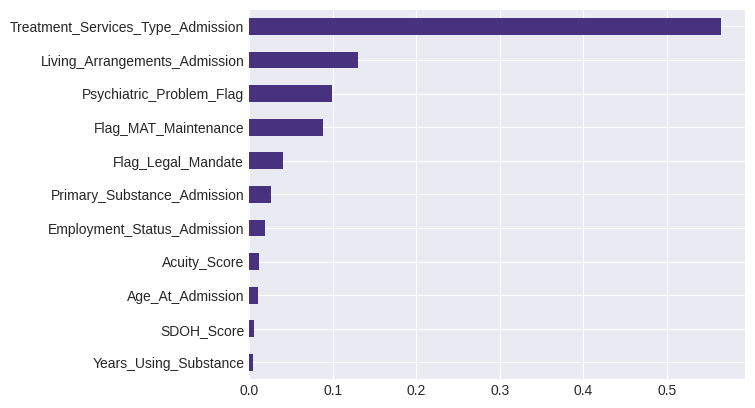

In [31]:
pd.Series(model_blind.feature_importances_, index=feature_cols_blind).sort_values().plot(kind='barh')